# 1. Load libaries

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import regularizers, optimizers 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline


# 2. Load data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [4]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


# 3. Data Normalization

In [5]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train = x_train/255.0
x_test  = x_test/255.0

In [6]:
# model - 12 layer - relu
model9 = keras.models.Sequential()
inputs = tf.keras.Input(shape=(32, 32, 3))
x = inputs 

# block 1
previous = x
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)


residual = keras.layers.Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 

# block 2
previous = x
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)


residual = keras.layers.Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# block 3
previous = x
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)


residual = keras.layers.Conv2D(256, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# block 4
previous = x
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)


residual = keras.layers.Conv2D(512, (3, 3), strides=2, padding='same', activation='relu')(previous)
x = keras.layers.add([x, residual]) 


# flatten
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model9 = keras.Model(inputs, outputs)
model9.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d_1[0][0]']               
                                                                                              

In [7]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model9.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history9 = model9.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 44s - loss: 1.8958 - sparse_categorical_accuracy: 0.2920 - val_loss: 1.5033 - val_sparse_categorical_accuracy: 0.4527 - 44s/epoch - 224ms/step
Epoch 2/100
196/196 - 23s - loss: 1.3118 - sparse_categorical_accuracy: 0.5249 - val_loss: 1.1550 - val_sparse_categorical_accuracy: 0.5813 - 23s/epoch - 119ms/step
Epoch 3/100
196/196 - 23s - loss: 1.0137 - sparse_categorical_accuracy: 0.6390 - val_loss: 0.9268 - val_sparse_categorical_accuracy: 0.6744 - 23s/epoch - 115ms/step
Epoch 4/100
196/196 - 24s - loss: 0.7986 - sparse_categorical_accuracy: 0.7169 - val_loss: 0.8218 - val_sparse_categorical_accuracy: 0.7103 - 24s/epoch - 122ms/step
Epoch 5/100
196/196 - 24s - loss: 0.6425 - sparse_categorical_accuracy: 0.7745 - val_loss: 0.7802 - val_sparse_categorical_accuracy: 0.7357 - 24s/epoch - 123ms/step
Epoch 6/100
196/196 - 23s - loss: 0.5032 - sparse_categorical_accuracy: 0.8238 - val_loss: 0.7317 - val_sparse_categorical_accuracy: 0.7516 - 23s/epoch - 118ms/step
Epoch 7/10

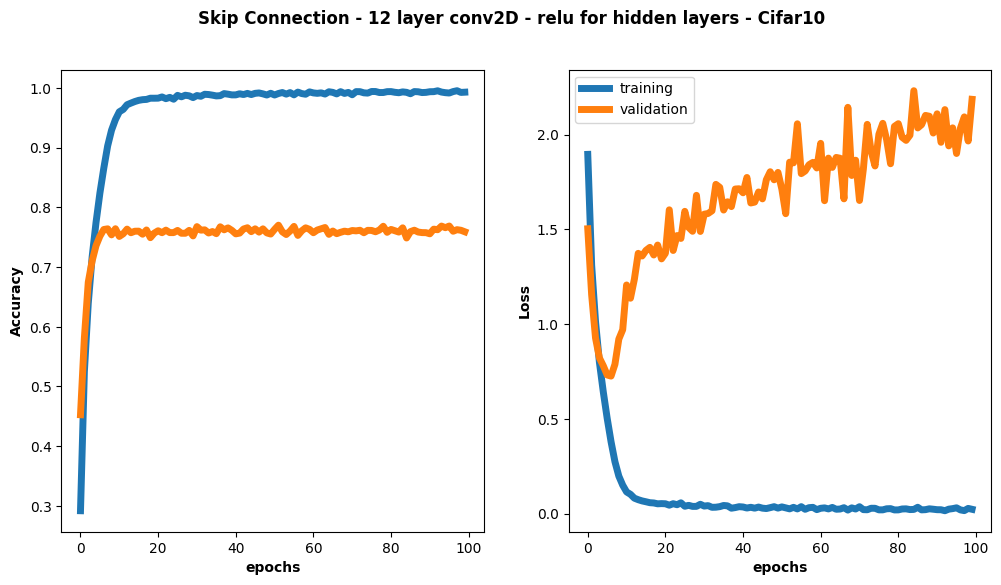

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history9.history['sparse_categorical_accuracy'])), history9.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history9.history['val_sparse_categorical_accuracy'])), history9.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history9.history['loss'])), history9.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history9.history['val_loss'])), history9.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("Skip Connection - 12 layer conv2D - relu for hidden layers - Cifar10", fontweight = 'bold')
plt.show()